# Plume  under shelf ice  

In [3]:
# load required packages
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
from matplotlib import colors
import xarray as xr

ModuleNotFoundError: No module named 'netCDF4'

In [2]:
# model parameters (have to be consistent with gotm.yaml)
NN0     = 1.0e-4                    # initial NN 
lat     = 79.0                      # latitude 
tx      = 0                    # surface stress


In [85]:
# derived parameters
f       = 4.*np.pi/86400.*np.sin(np.pi*lat/180.)      # Coriolis parameter
us      = np.sqrt(tx/1027.)                           # surface friction velocity


In [88]:
# load variables from netCDF
file        = 'plume.nc'
plumedata = nc.Dataset(file)  #  j'utilise dataset parce que ça convertie directement la variable de temps de date en seconde
plume = xr.open_dataset(file)

PermissionError: [Errno 1] Operation not permitted: 'plume.nc'

In [78]:
plume

<xarray.Dataset>
Dimensions:              (time: 0, lon: 1, lat: 1, z: 201, zi: 202)
Coordinates:
  * time                 (time) datetime64[ns] 
  * lon                  (lon) float32 9.969e+36
  * lat                  (lat) float32 9.969e+36
    z                    (time, z, lat, lon) float32 ...
    zi                   (time, zi, lat, lon) float32 ...
Data variables: (12/117)
    zeta                 (time, lat, lon) float32 ...
    u_taus               (time, lat, lon) float32 ...
    u10                  (time, lat, lon) float32 ...
    v10                  (time, lat, lon) float32 ...
    airt                 (time, lat, lon) float32 ...
    airp                 (time, lat, lon) float32 ...
    ...                   ...
    us0                  (time, lat, lon) float32 ...
    vs0                  (time, lat, lon) float32 ...
    ds                   (time, lat, lon) float32 ...
    Ekin                 (time, lat, lon) float32 ...
    Epot                 (time, lat, lon) float32 ...
    Eturb                (time, lat, lon) float32 ...
Attributes:
    title:    plume under shelf ice
    comment:  file created by flexout - https://github.com/BoldingBruggeman/f...

In [63]:
# Extraction of the variable 
t       = plumedata.variables['time'][:]
# Calculez 't_seconds' en utilisant des opérations xarray
t_seconds = (t - t[0])
z_xr       = plume.variables['z'][:, :, 0, 0]      ; z = z_xr.data
zi_xr      = plume.variables['zi'][:, :, 0, 0]     ; zi = zi_xr.data
rho_xr     = plume.variables['rho'][:, :, 0, 0]    ; rho = rho_xr.data
u_xr       = plume.variables['u'][:, :, 0, 0]      ; u = u_xr.data
v_xr       = plume.variables['v'][:, :, 0, 0]      ; v = v_xr.data
nuh_xr     = plume.variables['nuh'][:, :, 0, 0]    ; nuh = nuh_xr.data
NN_xr      = plume.variables['NN'][:, :, 0, 0]     ; NN = NN_xr.data
tke_xr     = plume.variables['tke'][:, :, 0, 0]    ; tke = tke_xr.data
Eturb_xr   = plume.variables['Eturb'][:, 0,0]      ; Eturb = Eturb_xr.data


In [68]:
tke_xr


<xarray.Variable (time: 351, zi: 202)>
array([[1.000000e-08, 1.000000e-08, 1.000000e-08, ..., 1.000000e-08,
        1.000000e-08, 1.000000e-08],
       [7.239844e-01, 7.224626e-01, 7.209348e-01, ..., 1.686118e-01,
        1.510822e-01, 1.349223e-01],
       [3.246851e-02, 3.243048e-02, 3.239242e-02, ..., 3.458415e-02,
        3.465723e-02, 3.472259e-02],
       ...,
       [3.890603e-05, 3.907684e-05, 3.924718e-05, ..., 6.145609e-05,
        6.143761e-05, 6.162899e-05],
       [3.869265e-05, 3.886253e-05, 3.903193e-05, ..., 6.111876e-05,
        6.110023e-05, 6.129095e-05],
       [3.848104e-05, 3.864999e-05, 3.881846e-05, ..., 6.078421e-05,
        6.076561e-05, 6.095568e-05]], dtype=float32)
Attributes:
    units:          m2/s2
    long_name:      turbulent kinetic energy
    standard_name:  ??
    path:           /turbulence

In [74]:
nuh_xr.T


<xarray.Variable (zi: 202, time: 351)>
array([[9.99999997e-07, 4.22905960e+01, 6.15234280e+00, ...,
        1.01455010e-01, 1.01173259e-01, 1.00899443e-01],
       [9.99999997e-07, 4.20408936e+01, 6.10173941e+00, ...,
        1.01139560e-01, 1.00861877e-01, 1.00585699e-01],
       [9.99999997e-07, 4.17908478e+01, 6.05116987e+00, ...,
        1.00822747e-01, 1.00544356e-01, 1.00270607e-01],
       ...,
       [9.99999997e-07, 9.04723480e-02, 2.46644486e-02, ...,
        1.04772986e-03, 1.04485452e-03, 1.04199525e-03],
       [9.99999997e-07, 3.64100523e-02, 1.26089929e-02, ...,
        5.33142185e-04, 5.31677797e-04, 5.30221441e-04],
       [9.99999997e-07, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], dtype=float32)
Attributes:
    units:          m2/s
    long_name:      turbulent diffusivity of heat
    standard_name:  ??
    path:           /turbulence

In [55]:
# plot all following profiles at time index iPlt
NT      = t.size
iPlt    = NT-1
# water depth
H       = - z[iPlt,0]

### Plot at tend

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_20912/1987959794.py:17: RuntimeWarning: divide by zero encountered in log10
  ax2.plot(np.log10(NN[iPlt, :]), zi[iPlt, :])
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_20912/1987959794.py:17: RuntimeWarning: invalid value encountered in log10
  ax2.plot(np.log10(NN[iPlt, :]), zi[iPlt, :])
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_20912/1987959794.py:25: RuntimeWarning: divide by zero encountered in log10
  ax3.plot(np.log10(nuh[iPlt, :]), zi[iPlt, :])


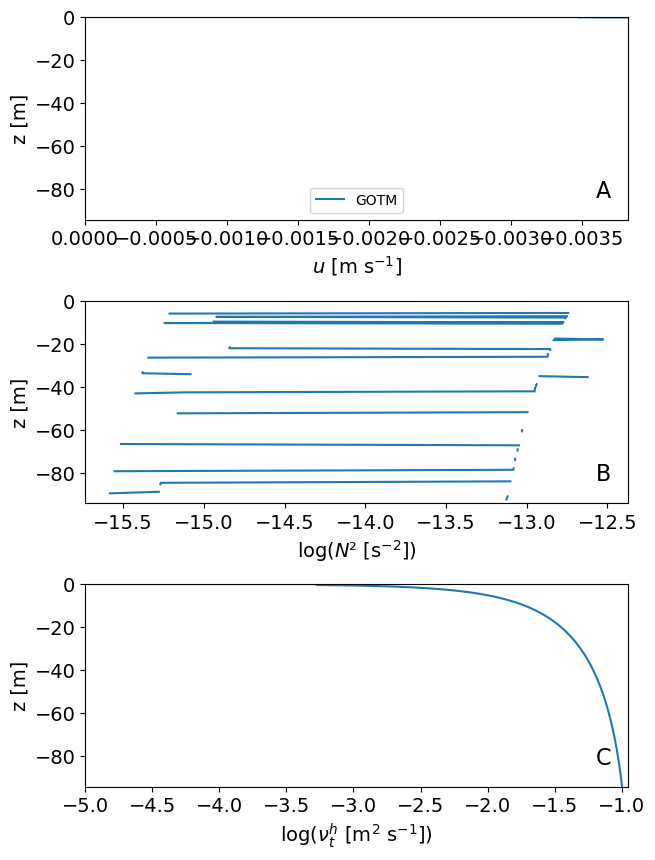

In [56]:

# plot vertical profiles at time index iPlt
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(7, 10))
plt.subplots_adjust(hspace=0.4)

bprops = {'facecolor': 'white', 'edgecolor': 'none', 'pad': 2}     # text label box properties

ax1.plot(u[iPlt, :], z[iPlt, :], label='GOTM')
ax1.set_xlabel('$u$ [m s$^{-1}$]', fontsize=14)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_xlim([0, 1.1*np.max(u[iPlt, :])])
ax1.set_ylim([-H, 0])
ax1.legend(loc='lower center')
ax1.text(0.97, 0.2, 'A', verticalalignment='top', horizontalalignment='right',
         transform=ax1.transAxes, fontsize=16, bbox=bprops)
ax1.tick_params(labelsize=14)

ax2.plot(np.log10(NN[iPlt, :]), zi[iPlt, :])
ax2.set_xlabel(r'log($N²$ [s$^{-2}$])', fontsize=14)
ax2.set_ylabel('z [m]', fontsize=14)
ax2.text(0.97, 0.2, 'B', verticalalignment='top', horizontalalignment='right',
         transform=ax2.transAxes, fontsize=16, bbox=bprops)
ax2.set_ylim([-H, 0])
ax2.tick_params(labelsize=14)

ax3.plot(np.log10(nuh[iPlt, :]), zi[iPlt, :])
ax3.set_xlabel(r'log($\nu^h_t$ [m$^2$ s$^{-1}$])', fontsize=14)
ax3.set_ylabel('z [m]', fontsize=14)
ax3.set_xlim([-5, np.log10(1.1*np.max(nuh[iPlt, :]))])
ax3.set_ylim([-H, 0])
ax3.text(0.97, 0.2, 'C', verticalalignment='top', horizontalalignment='right',
         transform=ax3.transAxes, fontsize=16, bbox=bprops)
ax3.tick_params(labelsize=14)

plt.savefig('plume.png')
plt.show()

### Plot of the Time serie

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_20912/1185012535.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gist_heat')
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_20912/1185012535.py:29: RuntimeWarning: divide by zero encountered in log10
  levels = MaxNLocator(nbins=40).tick_values(np.log10(NN).min(), np.log10(NN).max())
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_20912/1185012535.py:29: RuntimeWarning: invalid value encountered in log10
  levels = MaxNLocator(nbins=40).tick_values(np.log10(NN).min(), np.log10(NN).max())
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_20912/1

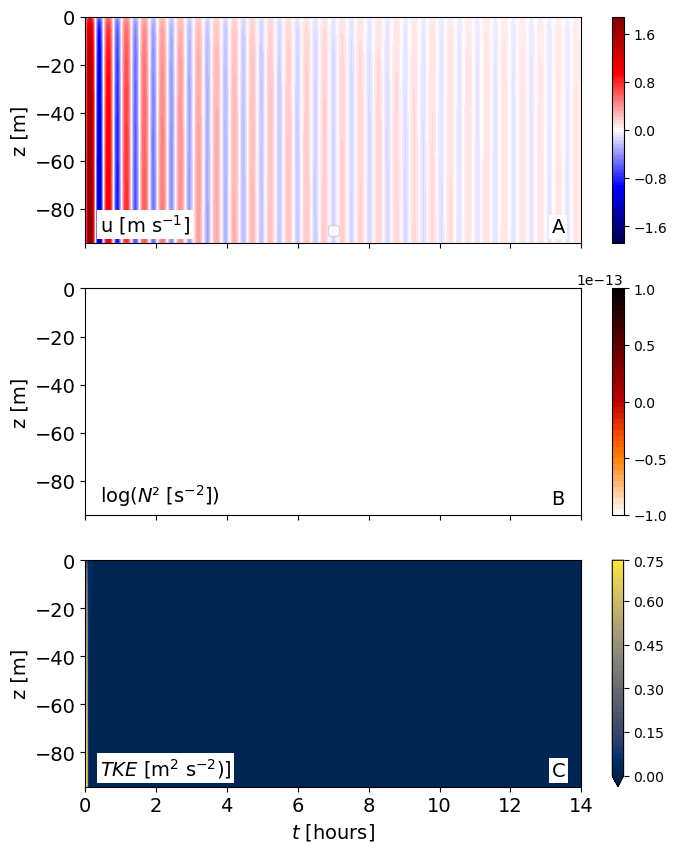

In [76]:

# plot contour plot of entire time series
fig2, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8, 10))
plt.subplots_adjust(hspace=0.2)

# generate 1D z-axes for plotting (assuming that grid doesn't change)
z1D   = z[0, :]
zi1D  = zi[0, :]

hour  = 3600
day   = 24*hour

levels = MaxNLocator(nbins=100).tick_values(-u.max(), u.max())
CS1 = ax1.contourf(t/day, z1D,  u.T, levels=levels, cmap='seismic')
ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.text(0.03, 0.03, 'u [m s$^{-1}$]', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.legend(loc='lower center')
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H, 0])
ax1.tick_params(labelsize=14)
ax1.xaxis.set_ticklabels([])
colorbar = fig2.colorbar(CS1, ax=ax1)
tick_locator = MaxNLocator(nbins=5)
colorbar.locator = tick_locator
colorbar.update_ticks()

cmap = plt.cm.get_cmap('gist_heat')
levels = MaxNLocator(nbins=40).tick_values(np.log10(NN).min(), np.log10(NN).max())
CS2 = ax2.contourf(t/day, zi1D, np.log10(NN.T), levels=levels, cmap=cmap.reversed())
#ax2.axhline(y=-h_ref,color='white', linestyle='--')
ax2.text(0.94, 0.03, 'B', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.text(0.03, 0.03, r'log($N²$ [s$^{-2}$])', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.set_ylabel('z [m]', fontsize=14)
ax2.set_ylim([-H, 0])
ax2.tick_params(labelsize=14)
ax2.xaxis.set_ticklabels([])
colorbar2 = fig2.colorbar(CS2, ax=ax2)
tick_locator = MaxNLocator(nbins=5)
colorbar2.locator = tick_locator
colorbar2.update_ticks()

cmap = plt.cm.get_cmap('cividis')
levels = MaxNLocator(nbins=40).tick_values(tke.min(), tke.max())
CS3 = ax3.contourf(t/day, zi1D, tke.T, levels=levels, extend='min', cmap=cmap)
#ax3.axhline(y=-h_ref,color='white', linestyle='--')
ax3.text(0.94, 0.03, 'C', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax3.transAxes, fontsize=14, bbox=bprops)
ax3.text(0.03, 0.03, r'$TKE$ [m$^2$ s$^{-2})$]', verticalalignment='bottom',
         horizontalalignment='left', backgroundcolor='w', transform=ax3.transAxes,
         fontsize=14, bbox=bprops)
ax3.set_xlabel('$t$ [hours]', fontsize=14)
ax3.set_ylabel('z [m]', fontsize=14)
ax3.set_ylim([-H, 0])
ax3.tick_params(labelsize=14)
tick_locator = MaxNLocator(nbins=5)
colorbar3 = fig2.colorbar(CS3, ax=ax3)
colorbar3.locator = tick_locator
colorbar3.update_ticks()

plt.savefig('plume2.png')
plt.show()

In [72]:
tke_xr

<xarray.Variable (time: 351, zi: 202)>
array([[1.000000e-08, 1.000000e-08, 1.000000e-08, ..., 1.000000e-08,
        1.000000e-08, 1.000000e-08],
       [7.239844e-01, 7.224626e-01, 7.209348e-01, ..., 1.686118e-01,
        1.510822e-01, 1.349223e-01],
       [3.246851e-02, 3.243048e-02, 3.239242e-02, ..., 3.458415e-02,
        3.465723e-02, 3.472259e-02],
       ...,
       [3.890603e-05, 3.907684e-05, 3.924718e-05, ..., 6.145609e-05,
        6.143761e-05, 6.162899e-05],
       [3.869265e-05, 3.886253e-05, 3.903193e-05, ..., 6.111876e-05,
        6.110023e-05, 6.129095e-05],
       [3.848104e-05, 3.864999e-05, 3.881846e-05, ..., 6.078421e-05,
        6.076561e-05, 6.095568e-05]], dtype=float32)
Attributes:
    units:          m2/s2
    long_name:      turbulent kinetic energy
    standard_name:  ??
    path:           /turbulence